# Marvel Character Classification

###Images have been scraped from the web.

## (1) Preprocessing: Detect face and eyes
When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.
Now how do you detect face and eyes?
We will use haar cascade from opencv for this.

In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pywt

In [3]:
img=cv2.imread("/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/images/black_widow/1c670f78dc.jpg")

In [4]:
img.shape

(800, 1200, 3)

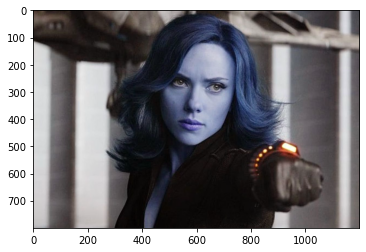

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(800, 1200)

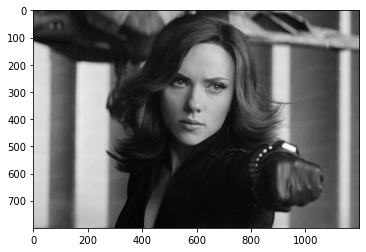

In [7]:
plt.imshow(gray, cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier('/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/Haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/Haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[443, 155, 311, 311]], dtype=int32)

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(443, 155, 311, 311)

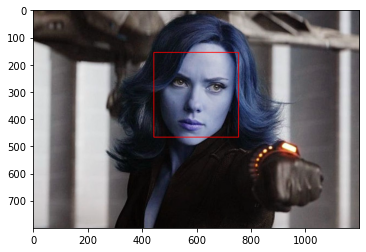

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

### (2) Preprocessing: Crop the facial region of the image

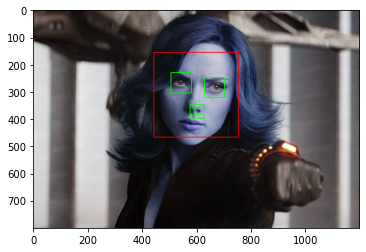

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

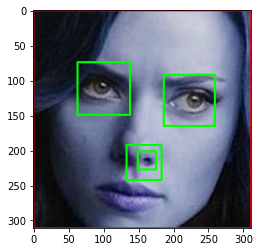

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

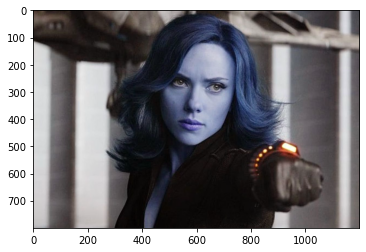

In [16]:
original_image = cv2.imread("/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/images/black_widow/1c670f78dc.jpg")
plt.imshow(original_image)

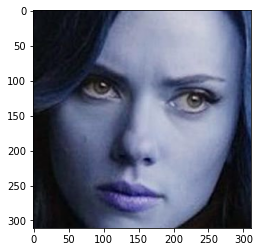

In [17]:
cropped_image = get_cropped_image_if_2_eyes("/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/images/black_widow/1c670f78dc.jpg")
plt.imshow(cropped_image)

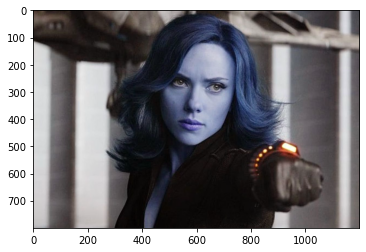

In [18]:
org_image_obstructed = cv2.imread("/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/images/black_widow/1c670f78dc.jpg")
plt.imshow(org_image_obstructed)

In [19]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/images/black_widow/1c670f78dc.jpg")
cropped_image_no_2_eyes

array([[[ 12,  16,  21],
        [ 16,  19,  27],
        [ 19,  22,  30],
        ...,
        [ 74,  99, 149],
        [ 70,  92, 140],
        [ 62,  82, 129]],

       [[ 14,  18,  23],
        [ 17,  20,  28],
        [ 18,  21,  29],
        ...,
        [ 72,  97, 147],
        [ 71,  93, 141],
        [ 62,  82, 129]],

       [[ 16,  20,  25],
        [ 17,  20,  28],
        [ 17,  20,  28],
        ...,
        [ 66,  91, 141],
        [ 63,  86, 134],
        [ 54,  77, 123]],

       ...,

       [[ 18,  20,  28],
        [ 22,  23,  33],
        [ 23,  25,  33],
        ...,
        [  9,  10,  14],
        [ 10,  13,  18],
        [ 10,  13,  18]],

       [[ 13,  17,  22],
        [ 16,  19,  27],
        [ 18,  22,  27],
        ...,
        [  9,  11,  12],
        [  8,  11,  15],
        [  8,  11,  15]],

       [[ 12,  16,  21],
        [ 15,  19,  24],
        [ 17,  21,  26],
        ...,
        [  9,  11,  12],
        [  8,  11,  15],
        [  8,  11,  15]]

### (3) Preprocessing: Use wavelet transform as a feature for traning our model
In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [41]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

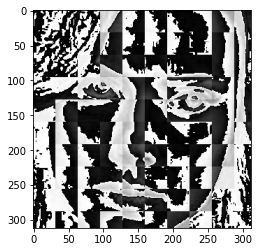

In [42]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

### (4)  Data prepartion for model training

In [20]:
path_to_data = "/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/images"
path_to_cr_data = "/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/cropped_images"

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/images/black_widow',
 '/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/images/iron_man',
 '/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/images/hulk',
 '/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/images/doctor_strange']

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [24]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

black_widow
Generating cropped images in folder:  /Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/cropped_imagesblack_widow
iron_man
Generating cropped images in folder:  /Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/cropped_imagesiron_man
hulk
Generating cropped images in folder:  /Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/cropped_imageshulk
doctor_strange
Generating cropped images in folder:  /Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/cropped_imagesdoctor_strange


In [25]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'cropped_imagesblack_widow': ['/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/cropped_imagesblack_widow/black_widow7.png',
  '/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/cropped_imagesblack_widow/black_widow6.png',
  '/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/cropped_imagesblack_widow/black_widow4.png',
  '/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/cropped_imagesblack_widow/black_widow5.png',
  '/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/cropped_imagesblack_widow/black_widow1.png',
  '/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/cropped_imagesblack_widow/black_widow2.png',
  '/Users/gayatrikvr/Documents/Personal-Study/Study-material/Image_Classification_ANN/cropped_imagesblack_widow/black_widow3.png',
  '/Users/gayatrikvr/Documents/Personal-Study/Study-ma

In [26]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped_imagesblack_widow': 0,
 'cropped_imagesiron_man': 1,
 'cropped_imageshulk': 2,
 'cropped_imagesdoctor_strange': 3}

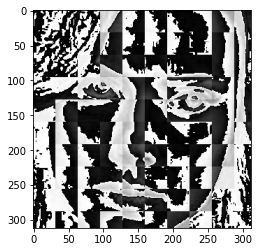

In [28]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [29]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if (img is None):
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [30]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(114, 4096)

### (5) Model Training

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5172413793103449

In [33]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.64      0.56        11
           1       0.67      0.67      0.67         6
           2       0.00      0.00      0.00         2
           3       0.44      0.40      0.42        10

    accuracy                           0.52        29
   macro avg       0.40      0.43      0.41        29
weighted avg       0.48      0.52      0.50        29



/Users/gayatrikvr/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [35]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [0,1,2]
        }
    }
}

In [37]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/Users/gayatrikvr/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/gayatrikvr/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gayatrikvr/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/gayatrikvr/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/gayatrikvr/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 966, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn/svm/_liblinea

,model,best_score,best_params
0,svm,0.658824,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.576471,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.588235,{'logisticregression__C': 1}


In [40]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

# There is a 30% improvement in accuracy after hyperparameter tuning the SVM parameters.